# Shows Previews of Transforms Applied to Samples Before Training

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
from utils import *

import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch import nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from torchvision import models
#from torchvision.transforms import functional

import random
from macdataset import MacDataset
import macnet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import traceback

In [2]:
PATHS = [r"..\data\processed\alveolar.pickle", r"..\data\processed\marrow.pickle"]
BATCH_SIZE = 4
NUM_WORKERS = 2

In the cell below we load test and train datasets, define image transformers

In [3]:
transforms = transforms.Compose([
    standardize_input(),
    rotate_90_input(),
    gaussian_blur(5,1)
    ])

In [11]:
raw_images = []
raw_labels = []
for i, path in enumerate(PATHS):
    path_data = pickle.load(open(path, "rb"))
    path_data["labels"][:] = i
    raw_images.append(path_data["images"])
    raw_labels.append(path_data["labels"])

training_images = np.vstack(raw_images)[:,[0,3],:,:]
training_labels = np.hstack(raw_labels)

trainset = MacDataset(training_images, training_labels, 
                            transform=transforms)

train_sampler = equal_classes_sampler(trainset.labels)

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, sampler=train_sampler,
                        shuffle=False, num_workers=0)


[[38. 36. 40. ... 38. 36. 37.]
 [37. 38. 41. ... 37. 35. 38.]
 [37. 38. 38. ... 40. 38. 40.]
 ...
 [39. 38. 39. ... 41. 39. 38.]
 [37. 36. 39. ... 39. 39. 40.]
 [37. 36. 40. ... 36. 36. 38.]]
[[182. 181. 180. ... 175. 177. 179.]
 [182. 181. 181. ... 174. 175. 177.]
 [183. 182. 183. ... 171. 172. 175.]
 ...
 [176. 177. 176. ... 177. 177. 177.]
 [176. 177. 176. ... 176. 176. 175.]
 [177. 178. 177. ... 175. 175. 175.]]


3.304084e-05
0.0003872164


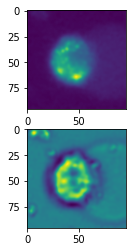

In [16]:
for batch, data in enumerate(trainloader): 
    img, label = data
    f, axarr = plt.subplots(2)
    axarr[0].imshow(img[0][0])
    axarr[1].imshow(img[0][1])
    plt.show()
    if batch < 2:
        break